## 전처리 완료된 파일 로드  
이전 분석 파일은 Py_project_car_1.ipynb 파일 참고


In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

In [3]:
df = pd.read_csv("/content/drive/MyDrive/simple_ml_for_sheets/updated_df_4.csv")
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,nissan,altima,2.5 s,sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,bmw,m5,base,sedan,automatic,wbsfv9c51ed593089,ca,3.4,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,chevrolet,cruze,1lt,sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,audi,a4,2.0t premium plus quattro,sedan,automatic,wauffafl3en030343,ca,4.2,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,chevrolet,camaro,lt,coupe,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


Description of the dataset columns
- Year: 차량의 제조년도 (2015), **int64**
- Make: 차량 제조 브랜드 (Kia, BMW, Volvo), **object**  
- Model: 차량의 특정 모델 ( Sorento, 3 Series, S60,), **object**  
- Trim: 모델의 특정 버전 또는 옵션 패키지\LX, 328i SULEV, T5, 650i)  , **object**
- Body: 차체 유형( SUV, Sedan)  , **object**
- Transmission: 변속기 (automatic)  , **object**
- VIN: 차량 식별 번호, 고유 코드  , **object**
- State: 차량이 소재하거나 등록된 주(CA for California) , **object**
- Condition: 차량 상태를 수치로 나타낸 것(5.0), **float64**  
- Odometer: 차량의 주행거리 또는 이동 거리  , **float64**
- Color: 차량의 외부 색상 , **object**
- Interior: 차량의 내부 색상  , **object**
- Seller: 차량을 판매하는 법인 또는 회사(예: 기아자동차 미국 법인, 금융 서비스 리마케팅) , **object**

- MMR: 자동차 업계에서 사용되는 가격 책정 도구 , **float64**  
- Selling Price: 차량이 판매된 가격, **float64**  
- Sale Date: 차량이 판매된 날짜 및 시간 , **object**


In [ ]:
pd.concat([df.isna().sum(), df.isnull().sum()],axis = 1, keys=(['isna','isnull']))
#na값 없음

,isna,isnull
year,0,0
make,0,0
model,0,0
trim,0,0
body,0,0
transmission,0,0
vin,0,0
state,0,0
condition,0,0
odometer,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541511 entries, 0 to 541510
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          541511 non-null  int64  
 1   make          541511 non-null  object 
 2   model         541511 non-null  object 
 3   trim          541511 non-null  object 
 4   body          541511 non-null  object 
 5   transmission  541511 non-null  object 
 6   vin           541511 non-null  object 
 7   state         541511 non-null  object 
 8   condition     541511 non-null  float64
 9   odometer      541511 non-null  float64
 10  color         541511 non-null  object 
 11  interior      541511 non-null  object 
 12  seller        541511 non-null  object 
 13  mmr           541511 non-null  float64
 14  sellingprice  541511 non-null  float64
 15  saledate      541511 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 66.1+ MB


 다중공산성 확인 - 수치형 변수만 선별하여 임시 데이터 프레임 생성 후 다중공산성 확인한다


In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64']).drop(columns=['sellingprice'])  # 수치형변수로 df_numeric 생성, y값 제외

# 다중공산성 확인하는 코드 작성
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
  vif_data = pd.DataFrame() # 빈데이터 프레임 생성
  vif_data["Feature"] = df.columns
  vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]  # VIF 계산
  return vif_data

vif_result= calculate_vif(df_numeric) # vif_result에 정의된 함수에 수치형 변수의 임시 데이터 입력

print(vif_result)



     Feature        VIF
0       year  30.867340
1  condition  21.164076
2   odometer   4.535540
3        mmr   5.010126


In [ ]:
# len(df['body'].unique()), #body 고유값 15개
df['body'].unique()

array(['suv', 'sedan', 'coupe', 'convertible', 'wagon', 'hatchback',
       'crew cab', 'minivan', 'van', 'truck', 'sportscar', 'regular cab',
       'pickup', 'extended cab', 'incomplete'], dtype=object)

In [ ]:
len(df['make'].unique()) #make 고유값 54개

54

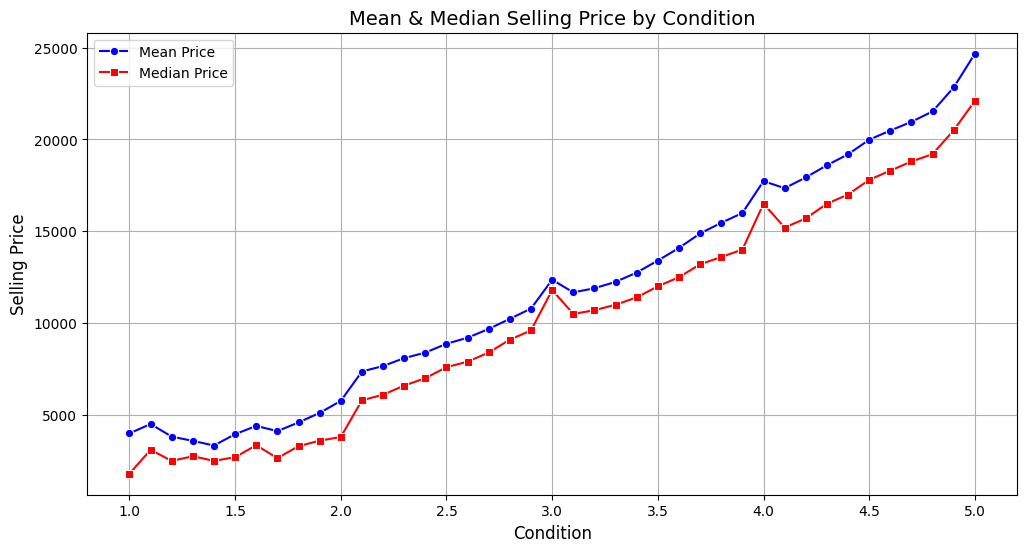

In [ ]:
stats_df = df.groupby(['condition'])['sellingprice'].agg(['mean', 'median'])

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')

# 그래프 제목 및 레이블 추가
plt.title('Mean & Median Selling Price by Condition', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [ ]:
# 간단하게 randomForest 모델 생성

# 필요한 라이브러리 호출 ,# objact 변수의 타켓 인코딩화
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df.drop(['sellingprice','vin','trim','seller','mmr'], axis=1)  # 'sellingprice'는 y값, 나머지는 X
y = df['sellingprice']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# object 형 변수(범주형 변수) 선택
cat_features = X_train.select_dtypes(include=['object']).columns

# 타겟 인코딩 적용
target_encoder = TargetEncoder(cols=cat_features)
X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
X_test[cat_features] = target_encoder.transform(X_test[cat_features])

# 랜덤 포레스트 모델 생성
rf = RandomForestRegressor(
    n_estimators=50,     # 트리 개수 줄이기
    max_depth=10,        # 트리 깊이 제한
    n_jobs=-1,           # 병렬 처리 활성화
    max_samples=0.7,     # 데이터 일부만 사용 (70%)
    random_state=42
)

# 모델 학습
rf.fit(X_train, y_train)

# ✅ 테스트 데이터 예측
y_pred = rf.predict(X_test)

# ✅ 성능 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📌 MAE (평균 절대 오차): {mae:.2f}")
print(f"📌 RMSE (루트 평균 제곱 오차): {rmse:.2f}")
print(f"📌 R² (결정 계수): {r2:.4f}")


📌 MAE (평균 절대 오차): 2105.13
📌 RMSE (루트 평균 제곱 오차): 3358.97
📌 R² (결정 계수): 0.8828


In [ ]:
# 중요 변수 확인
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 중요 변수 출력
print(feature_importances)

         Feature  Importance
2          model    0.466268
7       odometer    0.375741
0           year    0.090947
1           make    0.032106
3           body    0.016766
6      condition    0.013871
10      saledate    0.001900
9       interior    0.001458
5          state    0.000583
8          color    0.000248
4   transmission    0.000112


예측가격과 실제 가격이 2100 ~ 3360 달러의 차이를 보일수 있으며 모델의 예측 범위는 88%이다
이러한 차이를 자세히 확인하기 위해 모델별로 동일한 생산년도의 모델을 가지고 분포를 확인해 본다 -> 그 분포에 차이를 보이는 사유를 다른 변수를 통해 확인해 본다 -> 또는 동일한 년도 동일한 모델의 데이터를 일정 수 확보한 다음 모델을 돌려 차이를 발생시키는 변수를 다시 한번 확인 해 본다

2. 가장 빈도가 많은 모델을 골라서 분포도를 확인해본다 - 이전 은영님 작업


In [ ]:
temp_df = df.groupby(['year','model']).size().reset_index(name='count')
temp_df.sort_values(by='count', ascending=False)

#2012,2013 년도의 altima, fusion 의 데이터만 모아서 new_df 로 저장하여 randomForest  모델 재 생성

,year,model,count
4202,2012,altima,8341
4518,2013,altima,5156
4296,2012,fusion,4065
4588,2013,escape,4039
4608,2013,fusion,3624
...,...,...,...
184,1994,s10,1
186,1994,seville,1
188,1994,spirit,1
1010,2000,q45,1


In [ ]:
model_df = df[df['year'].isin([2012, 2013]) & df['model'].isin(['altima', 'fusion'])]

model_df.groupby(['year','model']).size().reset_index(name = 'cnt')

,year,model,cnt
0,2012,altima,8341
1,2012,fusion,4065
2,2013,altima,5156
3,2013,fusion,3624


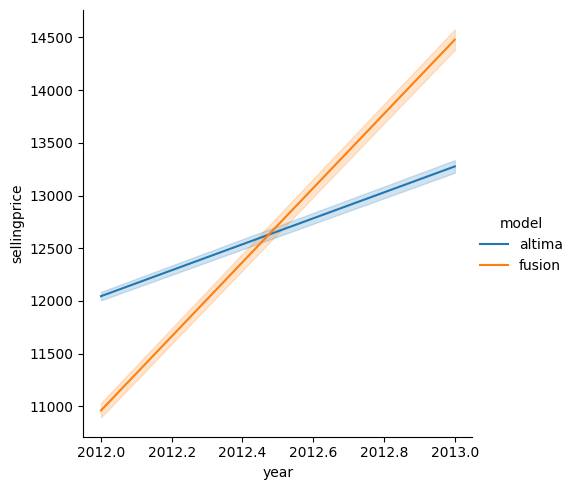

In [ ]:
sns.relplot(data=model_df, x='year', y='sellingprice', hue='model', kind='line')


In [ ]:
# 간단하게 randomForest 모델 생성

# 필요한 라이브러리 호출 ,# objact 변수의 타켓 인코딩화
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = model_df.drop(['sellingprice','vin','trim','seller','mmr'], axis=1)  # 'sellingprice'는 y값, 나머지는 X
y = model_df['sellingprice']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# object 형 변수(범주형 변수) 선택
cat_features = X_train.select_dtypes(include=['object']).columns

# 타겟 인코딩 적용
target_encoder = TargetEncoder(cols=cat_features)
X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
X_test[cat_features] = target_encoder.transform(X_test[cat_features])

# 랜덤 포레스트 모델 생성
rf = RandomForestRegressor(
    n_estimators=50,     # 트리 개수 줄이기
    max_depth=10,        # 트리 깊이 제한
    n_jobs=-1,           # 병렬 처리 활성화
    max_samples=0.7,     # 데이터 일부만 사용 (70%)
    random_state=42
)

# 모델 학습
rf.fit(X_train, y_train)

# ✅ 테스트 데이터 예측
y_pred = rf.predict(X_test)

# ✅ 성능 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📌 MAE (평균 절대 오차): {mae:.2f}")
print(f"📌 RMSE (루트 평균 제곱 오차): {rmse:.2f}")
print(f"📌 R² (결정 계수): {r2:.4f}")


📌 MAE (평균 절대 오차): 1059.03
📌 RMSE (루트 평균 제곱 오차): 1544.27
📌 R² (결정 계수): 0.6305


In [ ]:
# 중요 변수 확인
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 중요 변수 출력
print(feature_importances)

         Feature  Importance
7       odometer    0.538892
0           year    0.178353
6      condition    0.142833
10      saledate    0.060592
5          state    0.020792
8          color    0.013376
3           body    0.012705
9       interior    0.012076
2          model    0.008533
1           make    0.006984
4   transmission    0.004864


In [ ]:
# X_test의 데이터 타입 확인
print(X_test.dtypes)

# X_test의 결측값 확인
print(X_test.isnull().sum())

year              int64
make            float64
model           float64
body            float64
transmission    float64
state           float64
condition       float64
odometer        float64
color           float64
interior        float64
saledate        float64
dtype: object
year            0
make            0
model           0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
saledate        0
dtype: int64


In [ ]:
import shap

# SHAP Explainer 생성 및 SHAP 값 계산
explainer = shap.Explainer(rf, X_test)
shap_values = explainer(X_test)

# SHAP 요약 플롯 출력
shap.summary_plot(shap_values, X_test)

100%|===================| 4224/4238 [00:44<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 13782.023851, while the model output was 13921.211602. If this difference is acceptable you can set check_additivity=False to disable this check.

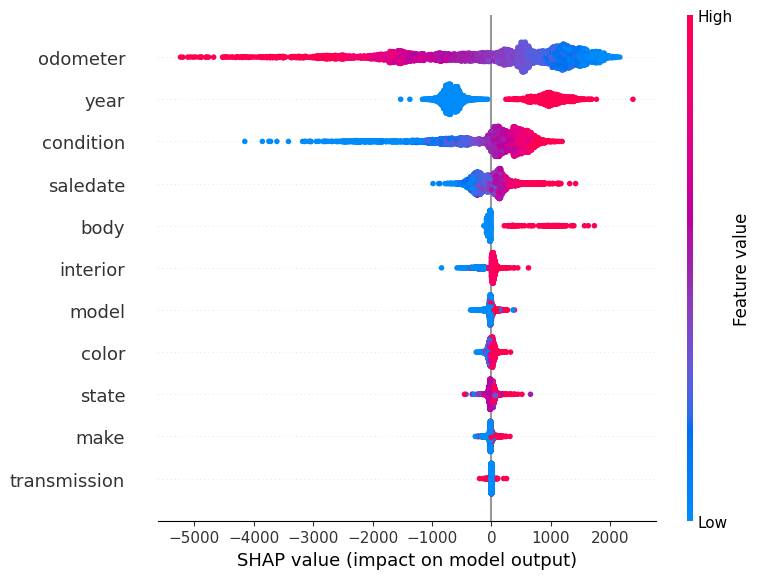

In [ ]:
# TreeExplainer 사용 (check_additivity=False 가능)
explainer = shap.TreeExplainer(rf, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_test, check_additivity=False)

# SHAP 요약 플롯 출력
shap.summary_plot(shap_values, X_test)

In [ ]:
shap_df.mean().sort_values(ascending=False)

NameError: name 'shap_df' is not defined

In [ ]:
df.groupby('year').size().reset_index(name = 'count').sort_values(by='count', ascending=False)
#2012년과 2013년의 데이터만 추출하여 바디의 분포 확인

,year,count
25,2012,101169
26,2013,97624
27,2014,80374
24,2011,47701
21,2008,30334
20,2007,28875
23,2010,25760
19,2006,25212
22,2009,20021
18,2005,19779


In [ ]:
df.groupby('body')['sellingprice'].agg(['mean','median','min','max'])

,mean,median,min,max
body,,,,
convertible,19227.797331,15500.0,275.0,163000.0
coupe,18816.925896,18000.0,100.0,183000.0
crew cab,18578.919562,18300.0,200.0,65000.0
extended cab,13284.070796,10600.0,1300.0,34500.0
hatchback,9929.894935,10000.0,200.0,57000.0
incomplete,9656.060606,7900.0,1300.0,28250.0
minivan,11963.775789,11900.0,100.0,43500.0
pickup,13245.364308,6800.0,225.0,54000.0
regular cab,10915.870949,10700.0,200.0,34300.0


In [ ]:
body_df = df[df['year'].isin([2012,2013])]
#body_df.head(5)
body_df.groupby('body')['sellingprice'].agg(['mean','median','min','max'])

,mean,median,min,max
body,,,,
convertible,28137.501491,26500.0,3800.0,163000.0
coupe,22389.150365,21250.0,1100.0,156500.0
crew cab,26189.644068,25500.0,5000.0,64000.0
hatchback,11396.185205,10800.0,1300.0,42000.0
minivan,14621.655839,13500.0,300.0,33600.0
pickup,34194.244604,34800.0,10000.0,49200.0
regular cab,15372.411616,15300.0,4000.0,34300.0
sedan,14839.876776,12700.0,300.0,171500.0
sportscar,74623.248408,74000.0,26750.0,110000.0


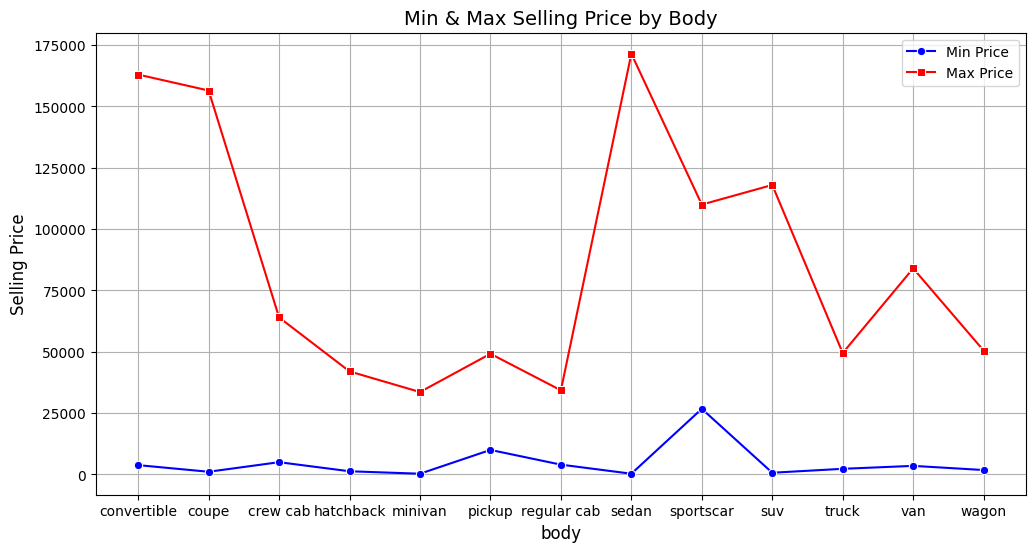

In [ ]:
stats_df = body_df.groupby(['body'])['sellingprice'].agg(['min', 'max'])

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='min', marker='o', label='Min Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='max', marker='s', label='Max Price', color='red')

# 그래프 제목 및 레이블 추가
plt.title('Min & Max Selling Price by Body', fontsize=14)
plt.xlabel('body', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

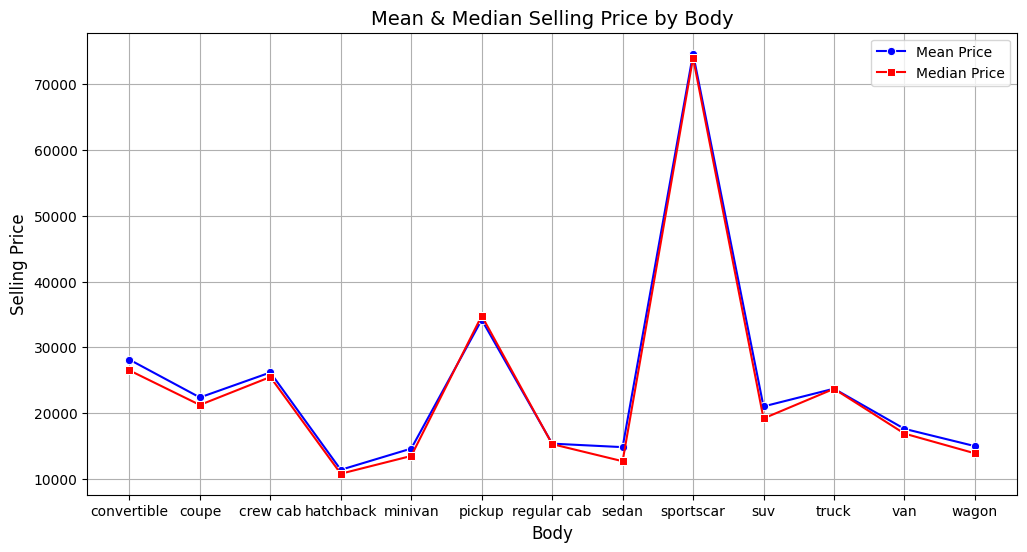

In [ ]:
stats_df = body_df.groupby(['body'])['sellingprice'].agg(['mean', 'median'])

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')

# 그래프 제목 및 레이블 추가
plt.title('Mean & Median Selling Price by Body', fontsize=14)
plt.xlabel('Body', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

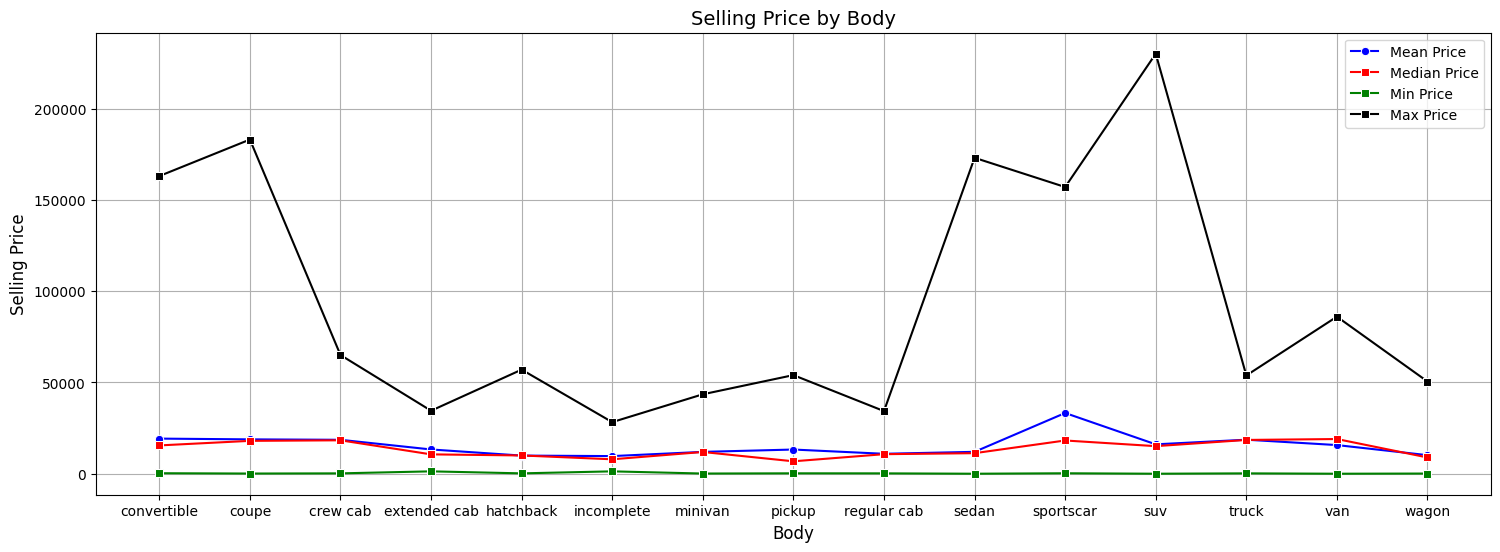

In [ ]:
stats_df = df.groupby(['body'])['sellingprice'].agg(['min','mean', 'median','max'])

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')
sns.lineplot(data=stats_df, x=stats_df.index, y='min', marker='s', label='Min Price', color='green')
sns.lineplot(data=stats_df, x=stats_df.index, y='max', marker='s', label='Max Price', color='black')

# 그래프 제목 및 레이블 추가
plt.title('Selling Price by Body', fontsize=14)
plt.xlabel('Body', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [ ]:
df.loc[df.groupby('body')['sellingprice'].idxmax(),['year','make','vin','model','body','condition','mmr','sellingprice']]

,year,make,vin,model,body,condition,mmr,sellingprice
284688,2013,bentley,scbgt3za7dc084568,continental gtc,convertible,4.4,152000.0,163000.0
530978,2011,ferrari,zff67nfa1b0178698,458 italia,coupe,4.6,182000.0,183000.0
457091,2014,ford,1ftfw1r65efc14766,f-150,crew cab,4.9,55300.0,65000.0
454129,2008,dodge,3d7ks29a18g173937,ram pickup 2500,extended cab,4.3,34800.0,34500.0
390844,2015,bmw,wba8z5c53fd672291,3 series gran turismo,hatchback,4.9,39500.0,57000.0
289160,2007,chevrolet,1gbjc34d27e168721,silverado,incomplete,5.0,15600.0,28250.0
390469,2014,dodge,2c4rdgcg5er304757,grand caravan,minivan,4.6,42600.0,43500.0
426464,2014,ram,3c63rrnl7eg307928,3500,pickup,4.3,54100.0,54000.0
389913,2013,ford,1ftnf1cf4dkf09528,f-150,regular cab,4.8,15800.0,34300.0
430795,2015,mercedes-benz,wddug7kb2fa102347,s-class,sedan,4.1,170000.0,173000.0


In [ ]:
df.loc[df.groupby('body')['sellingprice'].idxmin(),['year','make','model','body','condition','mmr','sellingprice']]

,year,make,model,body,condition,mmr,sellingprice
267180,2000,volvo,c70,convertible,2.0,1300.0,275.0
513424,2002,ford,escort,coupe,1.9,725.0,100.0
231339,2006,ford,f-150,crew cab,1.0,3700.0,200.0
369736,2002,mazda,truck,extended cab,2.0,2625.0,1300.0
247158,1995,ford,escort,hatchback,1.0,450.0,200.0
282525,2007,chevrolet,silverado,incomplete,2.0,6750.0,1300.0
20332,1993,ford,e-350,minivan,1.0,1775.0,100.0
143173,2003,dodge,dakota,pickup,1.9,6150.0,225.0
394107,1993,ford,f-150,regular cab,1.0,350.0,200.0
36440,2003,mercedes-benz,e-class,sedan,2.1,7325.0,1.0


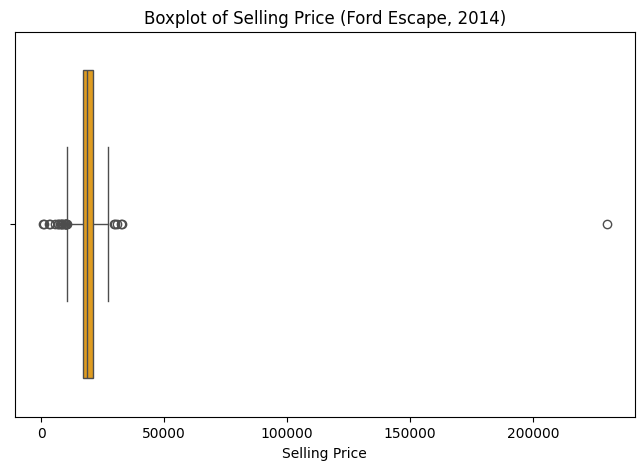

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=filtered_df['sellingprice'], color='orange')

plt.title("Boxplot of Selling Price (Ford Escape, 2014)")
plt.xlabel("Selling Price")

plt.show()


In [ ]:
year_df = df[(df['year']==2014) & (df['body']=='coupe')].groupby('make')['sellingprice'].agg(['mean','median','min','max'])
year_df.head()

,mean,median,min,max
make,,,,
audi,39254.629630,36000.0,28000.0,65500.0
bmw,46746.596859,39000.0,25000.0,165000.0
cadillac,42127.625000,42300.0,35250.0,51250.0
chevrolet,27073.437500,22000.0,10000.0,65200.0
dodge,22146.546053,21275.0,1200.0,39000.0


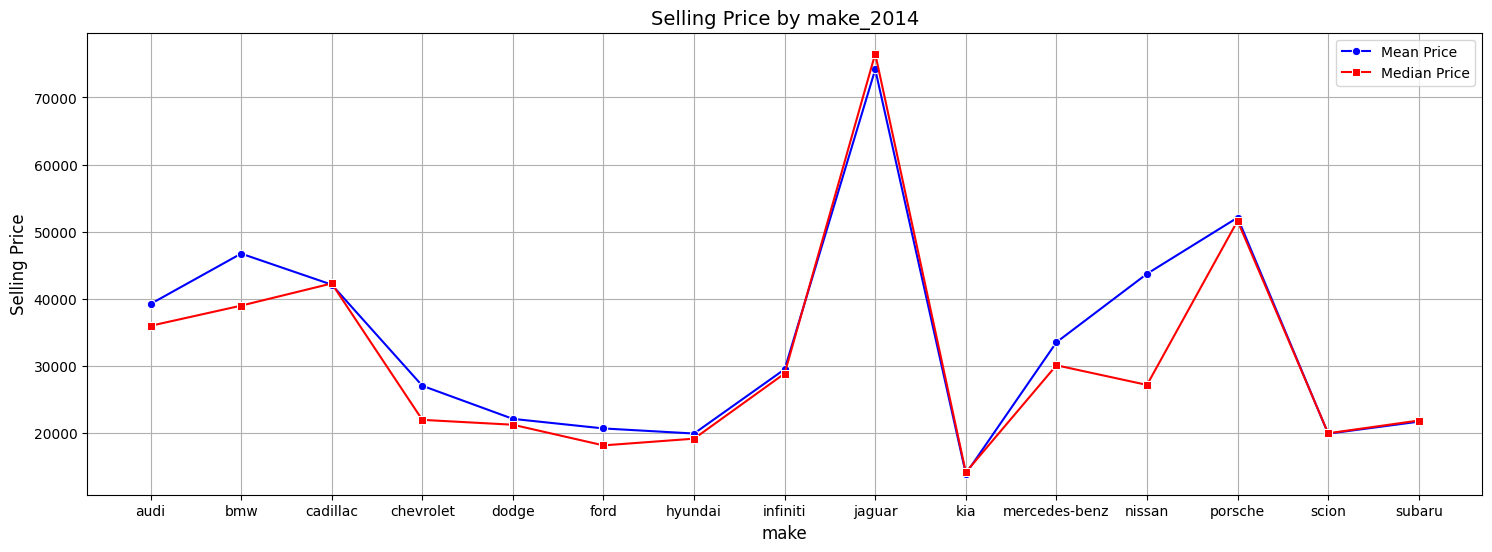

In [ ]:
stats_df = df[(df['year']==2014) & (df['body']=='coupe')].groupby('make')['sellingprice'].agg(['mean','median','min','max'])
# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')

# 그래프 제목 및 레이블 추가
plt.title('Coupe Selling Price by make_2014', fontsize=14)
plt.xlabel('make', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [5]:
df_2014 = df[df['year']==2014]
df_2014['model'].value_counts()
# fusion

,count
model,
camry,3055
fusion,2948
town and country,2818
grand caravan,2696
cruze,2665
...,...
500e,1
cts coupe,1
range,1


In [8]:
#df_2014[df_2014['model'] == 'fusion'].head(5)
df_fusion_2014 = df_2014[df_2014['model'] == 'fusion']
df_fusion_2014.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
3673,2014,ford,fusion,se,sedan,automatic,3fa6p0h95er294243,ca,4.3,11231.0,red,black,ford motor credit company,18000.0,15600.0,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
3676,2014,ford,fusion,se,sedan,automatic,3fa6p0h79er258389,ca,2.0,21182.0,silver,black,enterprise vehicle exchange / tra / rental / t...,15550.0,11600.0,Tue Dec 23 2014 12:00:00 GMT-0800 (PST)
3698,2014,ford,fusion,se,sedan,automatic,3fa6p0h70er220968,ca,2.9,22078.0,gray,black,midway hfc fleet/ars,15450.0,14200.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
3706,2014,ford,fusion,se,sedan,automatic,3fa6p0h77er271464,ca,2.9,20861.0,silver,black,midway hfc fleet/ars,15500.0,13500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
3722,2014,ford,fusion,se,sedan,automatic,3fa6p0h78er301488,ca,4.4,23074.0,white,black,ford motor credit company,15400.0,16800.0,Tue Jan 07 2014 13:00:00 GMT-0800 (PST)


In [15]:
# 필요한 라이브러리 호출
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# X, y 정의
X = df_fusion_2014.drop(['sellingprice', 'vin', 'trim', 'seller', 'mmr', 'body', 'saledate'], axis=1)
y = df_fusion_2014['sellingprice']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ object 형 변수(범주형 변수) 선택
cat_features = X_train.select_dtypes(include=['object']).columns


# ✅ 타겟 인코딩 적용 (경고 방지)
target_encoder = TargetEncoder(cols=cat_features)
X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
X_test[cat_features] = target_encoder.transform(X_test[cat_features])

# ✅ 개별 모델 학습 (RandomForest & XGBoost & LGBM)
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
xgb = XGBRegressor(n_estimators=200, max_depth=15, learning_rate=0.05, random_state=42)
lgbm = LGBMRegressor(n_estimators=200, max_depth=15, learning_rate=0.05, random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

# 개별 모델 예측 결과 저장
train_pred_rf = rf.predict(X_train)
train_pred_xgb = xgb.predict(X_train)
train_pred_lgbm = lgbm.predict(X_train)

test_pred_rf = rf.predict(X_test)
test_pred_xgb = xgb.predict(X_test)
test_pred_lgbm = lgbm.predict(X_test)

# ✅ 스태킹 데이터셋 생성
X_train_stack = np.column_stack((train_pred_rf, train_pred_xgb, train_pred_lgbm))
X_test_stack = np.column_stack((test_pred_rf, test_pred_xgb, test_pred_lgbm))

# ✅ 메타 모델 학습 (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(X_train_stack, y_train)

# 최종 예측
y_pred_stack = meta_model.predict(X_test_stack)

# ✅ 성능 평가
mae = mean_absolute_error(y_test, y_pred_stack)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2 = r2_score(y_test, y_pred_stack)

print(f"📌 MAE (평균 절대 오차): {mae:.2f}")
print(f"📌 RMSE (루트 평균 제곱 오차): {rmse:.2f}")
print(f"📌 R² (결정 계수): {r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 2358, number of used features: 6
[LightGBM] [Info] Start training from score 15667.909245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
📌 MAE (평균 절대 오차): 1749.33
📌 RMSE (루트 평균 제곱 오차): 2587.64
📌 R² (결정 계수): -0.0943


In [16]:
# 간단하게 randomForest 모델 생성

# 필요한 라이브러리 호출 ,# objact 변수의 타켓 인코딩화
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df_fusion_2014.drop(['sellingprice','vin','trim','seller','mmr'], axis=1)  # 'sellingprice'는 y값, 나머지는 X
y = df_fusion_2014['sellingprice']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# object 형 변수(범주형 변수) 선택
cat_features = X_train.select_dtypes(include=['object']).columns

# 타겟 인코딩 적용
target_encoder = TargetEncoder(cols=cat_features)
X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
X_test[cat_features] = target_encoder.transform(X_test[cat_features])

# 랜덤 포레스트 모델 생성
rf = RandomForestRegressor(
    n_estimators=50,     # 트리 개수 줄이기
    max_depth=10,        # 트리 깊이 제한
    n_jobs=-1,           # 병렬 처리 활성화
    max_samples=0.7,     # 데이터 일부만 사용 (70%)
    random_state=42
)

# 모델 학습
rf.fit(X_train, y_train)

# ✅ 테스트 데이터 예측
y_pred = rf.predict(X_test)

# ✅ 성능 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📌 MAE (평균 절대 오차): {mae:.2f}")
print(f"📌 RMSE (루트 평균 제곱 오차): {rmse:.2f}")
print(f"📌 R² (결정 계수): {r2:.4f}")


📌 MAE (평균 절대 오차): 1489.71
📌 RMSE (루트 평균 제곱 오차): 2105.58
📌 R² (결정 계수): 0.2755


In [17]:
# 중요 변수 확인
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 중요 변수 출력
print(feature_importances)

         Feature  Importance
10      saledate    0.534253
7       odometer    0.204169
6      condition    0.135147
5          state    0.055229
8          color    0.033588
9       interior    0.024349
4   transmission    0.013265
0           year    0.000000
1           make    0.000000
2          model    0.000000
3           body    0.000000


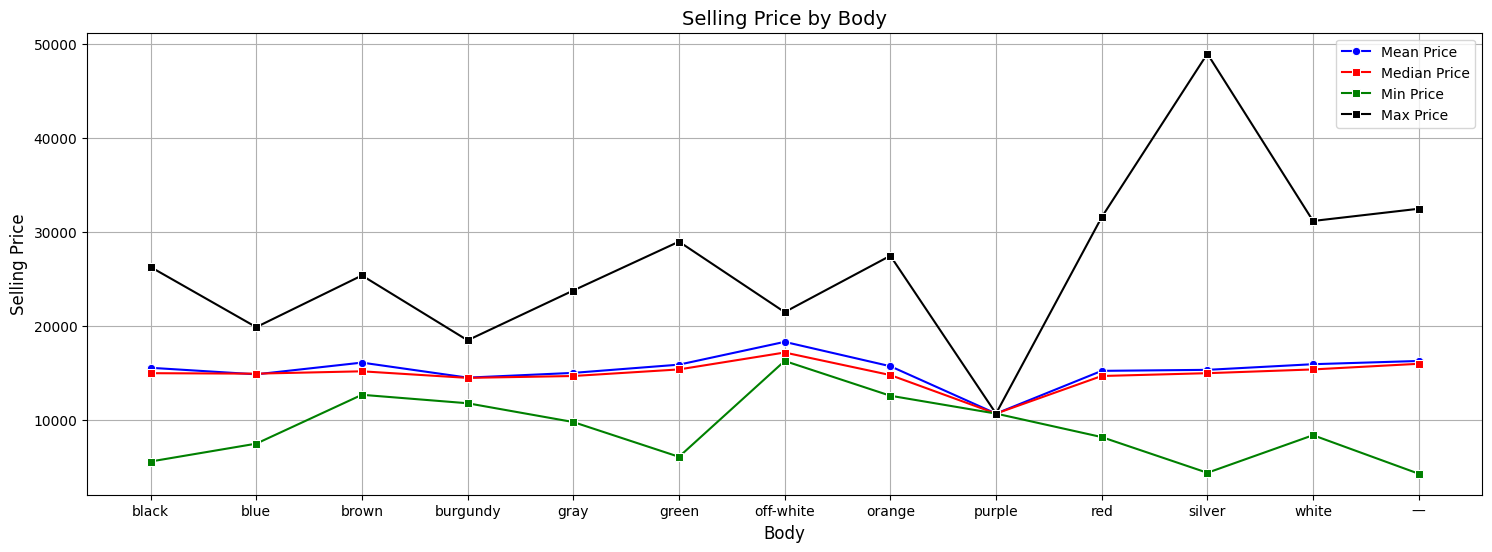

In [29]:
stats_df =  df_fusion_2014.groupby(['color'])['sellingprice'].agg(['min','mean', 'median','max'])

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')
sns.lineplot(data=stats_df, x=stats_df.index, y='min', marker='s', label='Min Price', color='green')
sns.lineplot(data=stats_df, x=stats_df.index, y='max', marker='s', label='Max Price', color='black')

# 그래프 제목 및 레이블 추가
plt.title('Selling Price by color', fontsize=14)
plt.xlabel('color', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

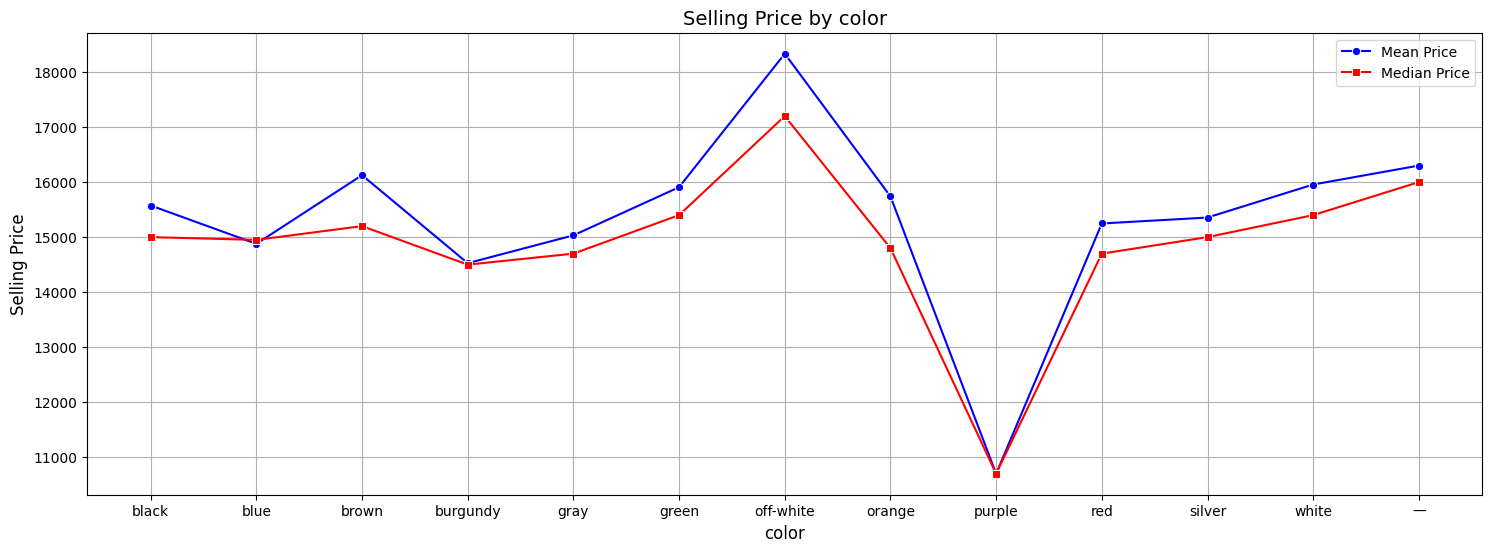

In [39]:
stats_df =  df_fusion_2014.groupby(['color'])['sellingprice'].agg(['min','mean', 'median','max'])

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')

# 그래프 제목 및 레이블 추가
plt.title('Selling Price by color', fontsize=14)
plt.xlabel('color', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [34]:
df_fusion_2014.groupby('condition')['sellingprice'].agg(['mean','median','min','max'])

,mean,median,min,max
condition,,,,
1.0,10422.222222,11350.0,4400.0,15100.0
1.9,11518.750000,11500.0,8200.0,14500.0
2.0,12141.860465,12100.0,7000.0,24000.0
2.1,12100.000000,11900.0,9900.0,14000.0
2.2,15800.000000,15800.0,15200.0,16400.0
2.3,17000.000000,17000.0,16100.0,17900.0
2.4,13035.714286,11800.0,9100.0,18600.0
2.5,13980.952381,13800.0,10000.0,20000.0
2.6,13766.666667,13650.0,12000.0,15900.0


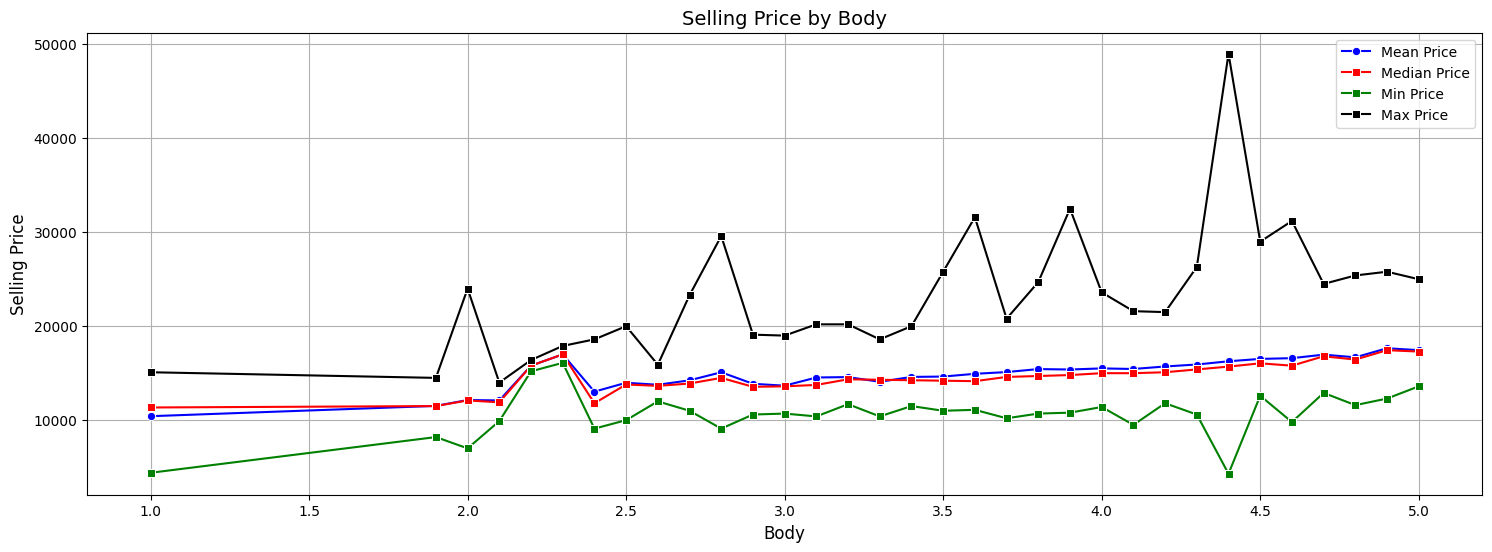

In [35]:
stats_df =  df_fusion_2014.groupby(['condition'])['sellingprice'].agg(['min','mean', 'median','max'])

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')
sns.lineplot(data=stats_df, x=stats_df.index, y='min', marker='s', label='Min Price', color='green')
sns.lineplot(data=stats_df, x=stats_df.index, y='max', marker='s', label='Max Price', color='black')

# 그래프 제목 및 레이블 추가
plt.title('Selling Price by condition', fontsize=14)
plt.xlabel('condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()


In [28]:
df_fusion_2014.sort_values(by='mmr', ascending=False)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
119234,2014,ford,fusion,se,sedan,automatic,3fa6p0h90er320201,mi,4.5,25317.0,orange,black,avis budget group,47800.0,14200.0,Thu Jun 25 2015 02:00:00 GMT-0700 (PDT)
429197,2014,ford,fusion,se,sedan,automatic,3fa6p0h96er332630,mn,4.4,31836.0,—,beige,avis budget group,31500.0,4300.0,Wed Jun 24 2015 06:00:00 GMT-0700 (PDT)
377505,2014,ford,fusion,se,sedan,automatic,3fa6p0h70er272617,tx,4.1,32481.0,black,—,avis corporation,31300.0,14500.0,Wed Jun 24 2015 03:00:00 GMT-0700 (PDT)
433733,2014,ford,fusion,titanium,sedan,automatic,3fa6p0k96er320468,tn,4.1,34312.0,white,black,avis budget group,30500.0,16800.0,Thu Jul 09 2015 08:00:00 GMT-0700 (PDT)
28841,2014,ford,fusion,titanium,sedan,others,3fa6p0d95er361798,qc,5.0,11696.0,gray,black,ford motor company of canada,30000.0,23400.0,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56150,2014,ford,fusion,se,sedan,automatic,3fa6p0hd6er214355,tx,4.6,35483.0,red,black,avis corporation,10900.0,15000.0,Wed Jun 24 2015 04:00:00 GMT-0700 (PDT)
391651,2014,ford,fusion,titanium,sedan,others,3fa6p0k92er319902,pa,4.6,33369.0,white,black,avis budget group,10800.0,16600.0,Wed Jun 03 2015 17:00:00 GMT-0700 (PDT)
440646,2014,ford,fusion,titanium,sedan,automatic,3fa6p0k96er332703,tx,4.8,32907.0,—,black,avis budget group,10800.0,17500.0,Wed Jun 24 2015 04:00:00 GMT-0700 (PDT)
514756,2014,ford,fusion,s,sedan,automatic,1fa6p0g76e5354954,nj,2.4,69375.0,silver,gray,ford motor credit company llc,10000.0,9100.0,Wed Jun 17 2015 02:00:00 GMT-0700 (PDT)


In [37]:
# color ANOVA 분석

import pandas as pd
import scipy.stats as stats

# color 그룹별 ANOVA 분석
anova_color = stats.f_oneway(*[df_fusion_2014[df_fusion_2014['color'] == c]['sellingprice'] for c in df_fusion_2014['color'].unique() if len(df_fusion_2014[df_fusion_2014['color'] == c]) > 1])

# 결과 출력
print("📌 ANOVA 분석 결과 (Color 그룹)")
print(f"F-Statistic: {anova_color.statistic:.4f}, p-value: {anova_color.pvalue:.4f}")

# p-value가 0.05보다 작으면 유의미한 차이가 있다고 판단
if anova_color.pvalue < 0.05:
    print("✅ Color 그룹 간에 유의미한 가격 차이가 있음!")
else:
    print("❌ Color 그룹 간에 유의미한 가격 차이가 없음.")

📌 ANOVA 분석 결과 (Color 그룹)
F-Statistic: 9.7712, p-value: 0.0000
✅ Color 그룹 간에 유의미한 가격 차이가 있음!


In [38]:
import pandas as pd
import scipy.stats as stats

# condition 그룹별 ANOVA 분석
anova_condition = stats.f_oneway(*[df_fusion_2014[df_fusion_2014['condition'] == c]['sellingprice'] for c in df_fusion_2014['condition'].unique() if len(df_fusion_2014[df_fusion_2014['condition'] == c]) > 1])

# 결과 출력

print("\n📌 ANOVA 분석 결과 (Condition 그룹)")
print(f"F-Statistic: {anova_condition.statistic:.4f}, p-value: {anova_condition.pvalue:.4f}")


if anova_condition.pvalue < 0.05:
    print("✅ Condition 그룹 간에 유의미한 가격 차이가 있음!")
else:
    print("❌ Condition 그룹 간에 유의미한 가격 차이가 없음.")


📌 ANOVA 분석 결과 (Condition 그룹)
F-Statistic: 20.5284, p-value: 0.0000
✅ Condition 그룹 간에 유의미한 가격 차이가 있음!


In [42]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# 데이터 불러오기 (df_fusion_2014 가 이미 존재한다고 가정)

# 1️⃣ 주행거리(odometer) 그룹화
df_fusion_2014['odometer_group'] = pd.cut(df_fusion_2014['odometer'], bins=10)  # 10개 구간으로 나누기

# 2️⃣ 가장 많은 데이터를 포함한 그룹 찾기
largest_group = df_fusion_2014['odometer_group'].value_counts().idxmax()  # 가장 많은 개체가 포함된 구간 찾기
df_filtered = df_fusion_2014[df_fusion_2014['odometer_group'] == largest_group]  # 해당 구간 데이터 필터링

# 🔹 분석 대상이 된 odometer 범위 출력
print(f"📌 분석 대상 주행거리 구간: {largest_group}")

# 3️⃣ Color별 ANOVA 분석 (판매 가격 차이)
color_groups = [df_filtered[df_filtered['color'] == col]['sellingprice'].dropna() for col in df_filtered['color'].unique()]
anova_color = stats.f_oneway(*color_groups)

# 4️⃣ Condition별 ANOVA 분석 (판매 가격 차이)
condition_groups = [df_filtered[df_filtered['condition'] == cond]['sellingprice'].dropna() for cond in df_filtered['condition'].unique()]
anova_condition = stats.f_oneway(*condition_groups)

# 5️⃣ 결과 출력
print(f"📌 ANOVA 결과 (Color별): F-statistic = {anova_color.statistic:.4f}, p-value = {anova_color.pvalue:.4f}")
print(f"📌 ANOVA 결과 (Condition별): F-statistic = {anova_condition.statistic:.4f}, p-value = {anova_condition.pvalue:.4f}")

if anova_color.pvalue < 0.05:
    print("✅ Color 그룹 간에 유의미한 가격 차이가 있음!")
else:
    print("❌ Color 그룹 간에 유의미한 가격 차이가 없음.")

if anova_condition.pvalue < 0.05:
    print("✅ Condition 그룹 간에 유의미한 가격 차이가 있음!")
else:
    print("❌ Condition 그룹 간에 유의미한 가격 차이가 없음.")


📌 분석 대상 주행거리 구간: (27718.3, 36957.4]
📌 ANOVA 결과 (Color별): F-statistic = 3.0608, p-value = 0.0005
📌 ANOVA 결과 (Condition별): F-statistic = 5.0742, p-value = 0.0000
✅ Color 그룹 간에 유의미한 가격 차이가 있음!
✅ Condition 그룹 간에 유의미한 가격 차이가 있음!


<ipython-input-42-928a53721954>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fusion_2014['odometer_group'] = pd.cut(df_fusion_2014['odometer'], bins=10)  # 10개 구간으로 나누기


<ipython-input-44-a360845cfe47>:24: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


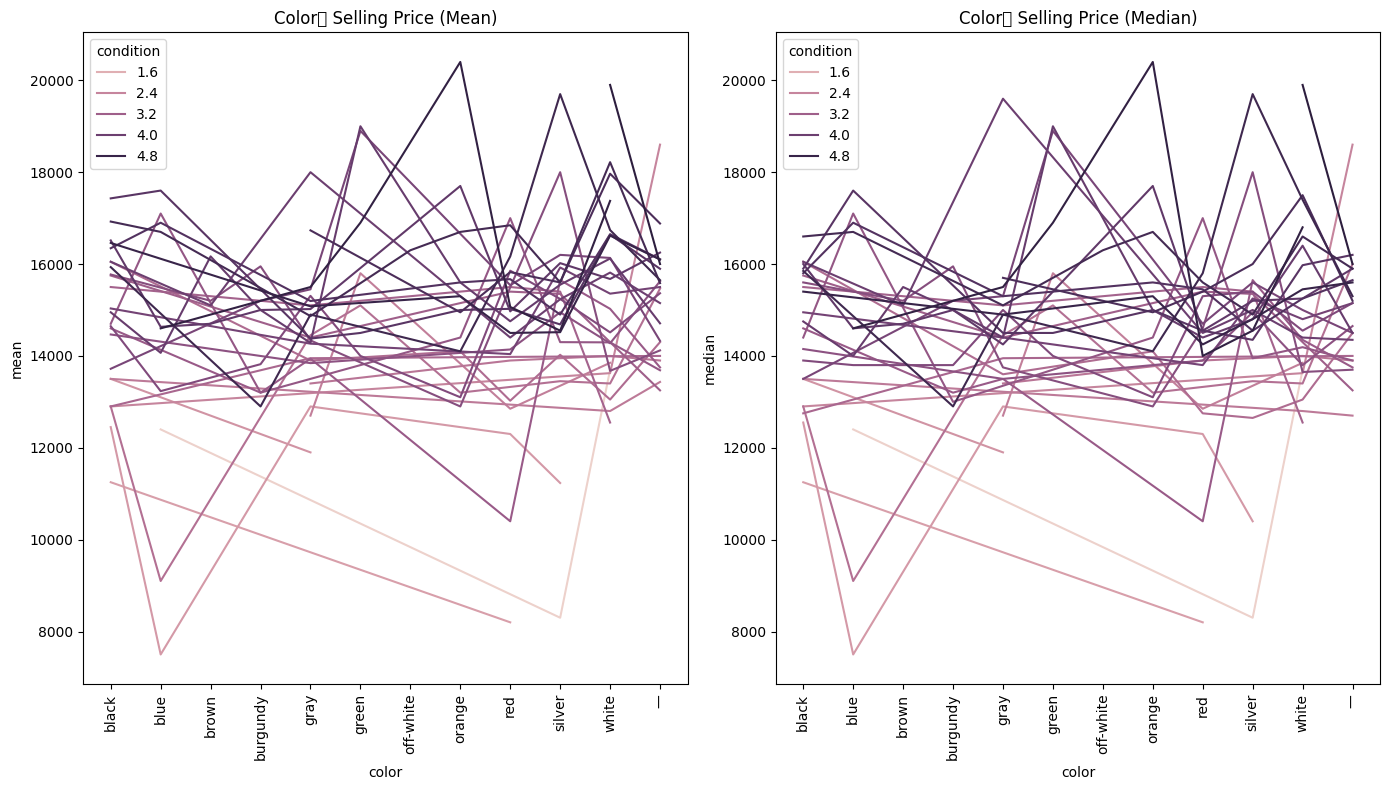

In [44]:

# 1️⃣ 주행거리 구간 필터링
odometer_filtered = df_fusion_2014[(df_fusion_2014['odometer'] > 27718.3) & (df_fusion_2014['odometer'] <= 36957.4)]

# 2️⃣ Color와 Condition별로 mean과 median 계산
color_condition_group = odometer_filtered.groupby(['color', 'condition'])['sellingprice'].agg(['mean', 'median']).reset_index()

# 3️⃣ 그래프 그리기

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 첫 번째 subplot: color별 mean, median
plt.subplot(1, 2, 1)
sns.lineplot(x='color', y='mean', hue='condition', data=color_condition_group)
plt.title('Color별 Selling Price (Mean)')
plt.xticks(rotation=90)

# 두 번째 subplot: condition별 mean, median
plt.subplot(1, 2, 2)
sns.lineplot(x='color', y='median', hue='condition', data=color_condition_group)
plt.title('Color별 Selling Price (Median)')
plt.xticks(rotation=90)

plt.tight_layout()  # 레이아웃 조정
plt.show()

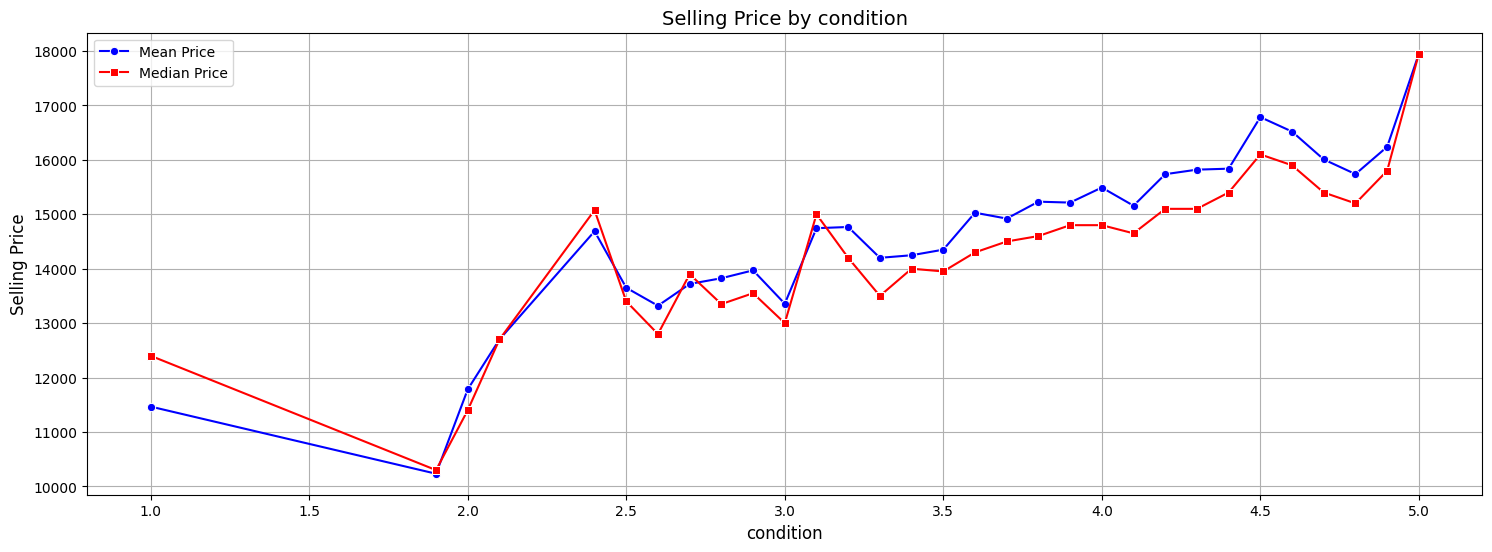

In [47]:
stats_df =  odometer_filtered.groupby(['condition'])['sellingprice'].agg(['min','mean', 'median','max'])

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')


# 그래프 제목 및 레이블 추가
plt.title('Selling Price by condition', fontsize=14)
plt.xlabel('condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()


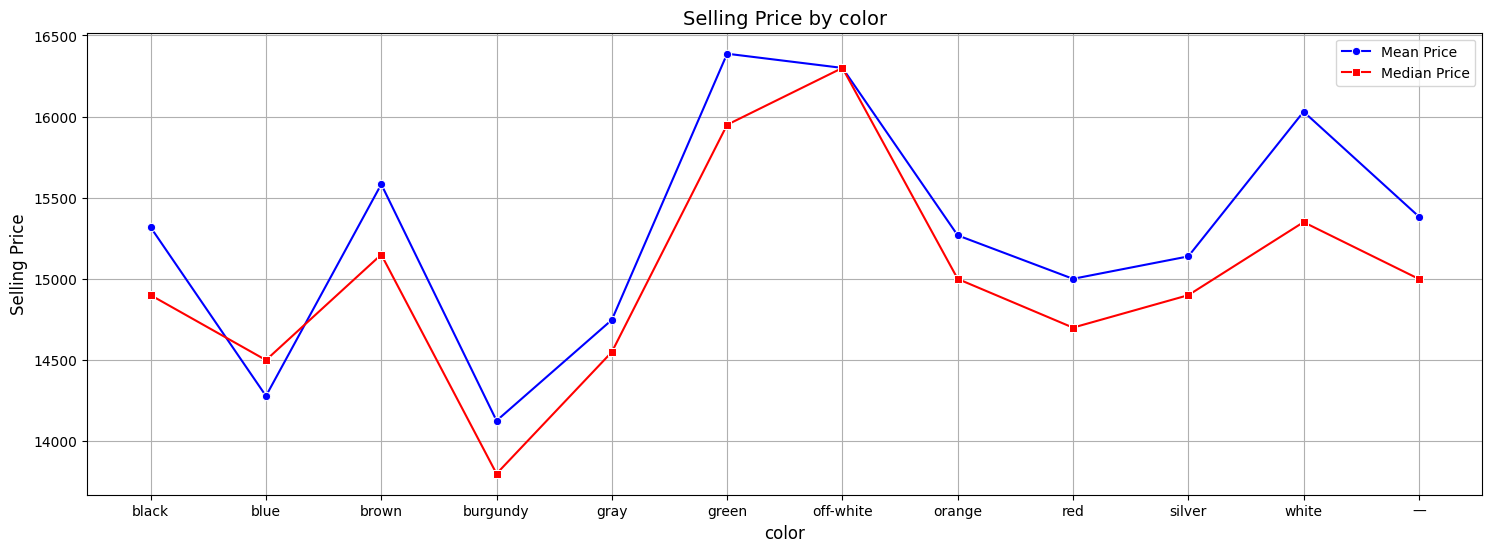

In [48]:
stats_df =  odometer_filtered.groupby(['color'])['sellingprice'].agg(['min','mean', 'median','max'])

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')

# 그래프 제목 및 레이블 추가
plt.title('Selling Price by color', fontsize=14)
plt.xlabel('color', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()